# Project: Exploratory Data Analysis on Zomato Dataset Using Python Libraries

## Learning Objectives:
Using Python libraries to analyse and deliver insights on Zomato Dataset.

## Introduction on Dataset:
- The full dataset can be found via: https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants
- Zomato is one of the largest Indian restaurant aggregator and food delivery companies. Zomato provides rating information, menu and user reviews on restaurants and food places as well as food delivery options across different cities in India
- The dataset contains thousands of values with 17 columns in total with the main focus on the city of Bengaluru.

Here are some details about our Dataset:
- Address: address of the restaurant
- Name: name of the restaurant
- Online Order: does this restaurant have online order option (yes/no)
- Book Table: does the restaurant have options for booking tables (yes/no)
- Rate: rating of the restaurant out of 5
- Location: city that the restaurant is located
- Rest type: type of the restaurant
- Cuisines: type of cuisine the restaurant serves

## Load Necessary Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./Zomato Dataset/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [2]:
# Check general info of our Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [3]:
# Remove unnecessary columns
df = df.drop(['url', 'phone', 'dish_liked'], axis=1)
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
# Check for duplicated values
df.duplicated().sum()

43

In [5]:
# Remove duplicate values from our dataset
df = df.drop_duplicates()

# Check for duplicated values again
df.duplicated().sum()

0

## Learning Note:
Here I encountered an error 'NoneType' has no attributes of duplicated() or isna() while previously using 'inplace = True'
within the code of drop_duplicates(). **The learning point is that the variable or output of my code (df) would eventually
be None, and hence, cannot execute functions in Pandas**. I have fixed the error accordingly and remove 'inplace = True' to avoid complications.

In [6]:
# Check for null values in the dataset
df.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

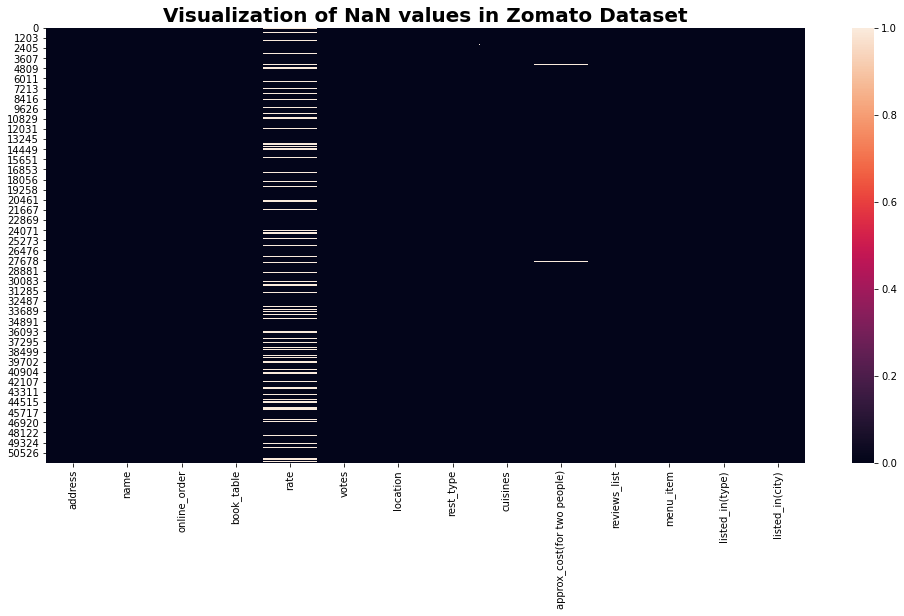

In [7]:
# Let's visualize the Null results
plt.figure(figsize=(17,8))
sns.heatmap(df.isnull()).set_title('Visualization of NaN values in Zomato Dataset', fontsize=20, weight='bold')
plt.show()

## Insight: 
White space in the heatmap indicates a missing value while black color demonstrates valid info. It seems that the column
'rate' and 'approx_cost' have a lot of NaN values. Luckily, our dataset is big enough (with 51717 values) for us to drop NaN without comprising any insights.

In [8]:
# Remove NaN values
df = df.dropna(how='any')

# Check summary info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [9]:
# Let's change names of some columns for more readability
df = df.rename(columns={'approx_cost(for two people)': 'cost', 'listed_in(type)': 'type', 'listed_in(city)':'city'})
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [10]:
# Check unique values for column 'cost'
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [11]:
# Check unique values for column 'rate'
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
# Remove 'NEW' value(s) from column 'rate'
df = df.loc[df['rate'] != 'NEW']

# Remove '-' value(s) from column 'rate'
df = df.loc[df['rate'] != '-']

# Remove pattern of '/5', leading and trailing whitespace
df['rate'] = df['rate'].apply(str).str.replace('/5', '')
df['rate'] = df['rate'].str.strip().astype('float')

df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

# 1. Let's explore the correlations between different variables on our dataset

Since there are some columns contain string values (Yes/No), I would attempt to use "one hot encoding" method - which 
is a process of **converting categorical data values** into binary values of 0 and 1 (usually for Machine Learning purposes).

In [13]:
# Change type of the 'cost' column
df['cost'] = df['cost'].apply(str).str.replace(',', '')
df['cost'] = df['cost'].str.strip()
df['cost'] = df['cost'].astype(float)
df['cost'].head()

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: cost, dtype: float64

In [14]:
# Encode input variables
def Encode(df):
    for column in df.columns[~df.columns.isin(['rate', 'cost', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

df_encode = Encode(df.copy())
df_encode

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,3137,2705,1,1,3.7,34,25,28,204,800.0,4028,0,6,29
51711,8791,1718,1,1,2.5,81,25,28,761,800.0,21082,0,6,29
51712,8725,6561,1,1,3.6,27,25,17,240,1500.0,20956,0,6,29
51715,8786,6598,1,0,4.3,236,56,17,237,2500.0,21054,0,6,29


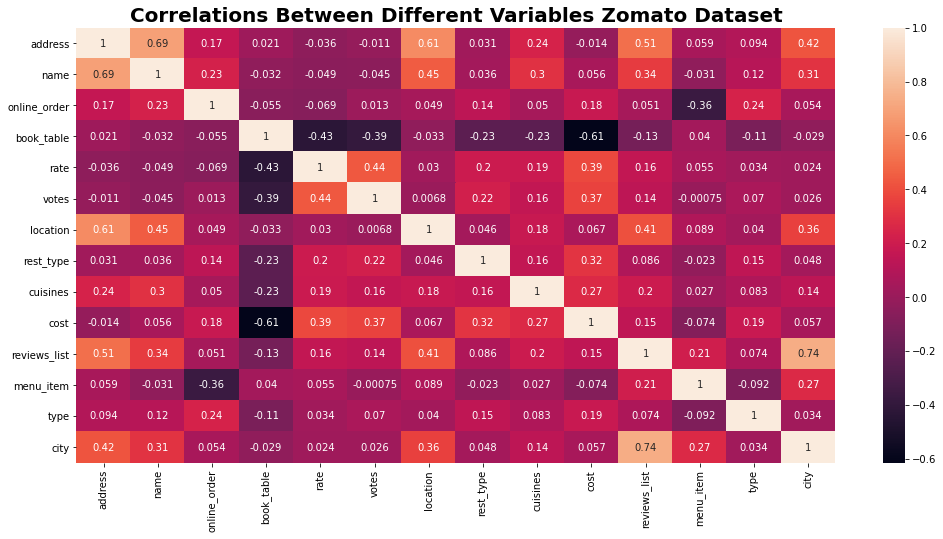

In [15]:
# Get correlations between different variables
plt.figure(figsize=(17,8))
corr = df_encode.corr()
sns.heatmap(corr, annot=True).set_title('Correlations Between Different Variables Zomato Dataset', fontsize=20, weight='bold')
plt.show()

## Insight:
- 'Rate' and 'Cost' have a moderately positive correlation of 0.39, which kinda makes sense since the higher the rating,
the higher the cost of dining in
- 'Rate' and 'Votes' are also positively correlated with correlation coefficient of 0.44
- Interestingly, there is a fairly negative relationship between 'Cost' and 'Book table'. Maybe this means that the more
expensive the restaurant is, the less likely they would allow options of booking a table in advance?

# 2. Can we visualize how many restaurants allow food delivery options?

In [16]:
# Check how many restaurants allow delivery 
df['online_order'].value_counts()

Yes    27081
No     14156
Name: online_order, dtype: int64

/Users/lephungdanthanh/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


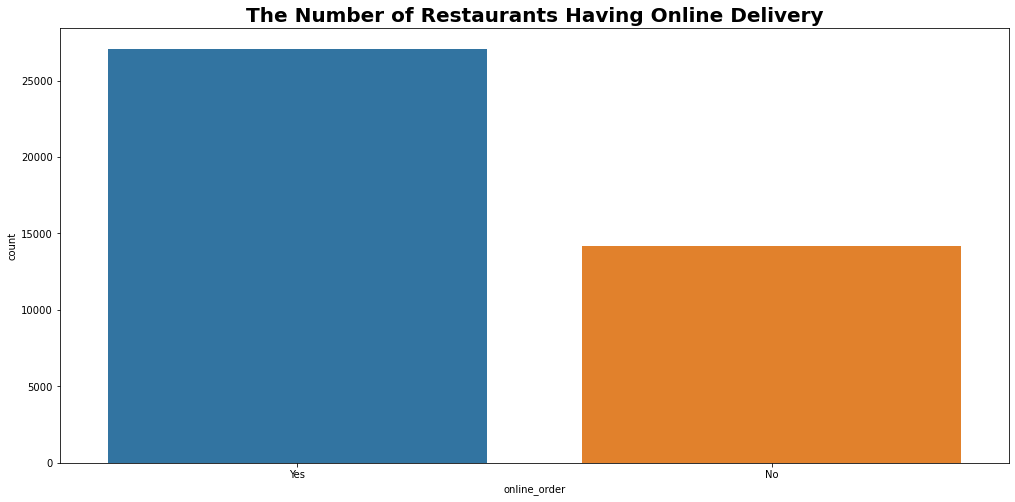

In [17]:
# Create a Bar chart for countplot
plt.figure(figsize=(17,8))
sns.countplot(df['online_order'])
plt.title('The Number of Restaurants Having Online Delivery', fontsize=20, weight='bold')
plt.show()

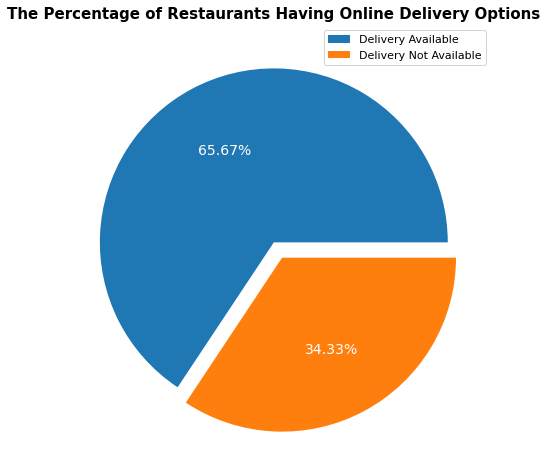

In [18]:
# Create a Pie chart for better visualization
percent_online_order = df['online_order'].value_counts(normalize=True)
label = ['Delivery Available', 'Delivery Not Available']

# Explode the 2nd slide (i.e. 'Delivery Not Available')
explode = (0, 0.1)

plt.figure(figsize=(15,8))
plt.pie(percent_online_order, autopct='%.2f%%', textprops={'fontsize': 14, 'color':'w'}, explode = explode)
plt.title('The Percentage of Restaurants Having Online Delivery Options', fontsize=15, weight='bold')
plt.legend(label, loc='upper right', fontsize=11)
plt.show()

# 3. Let's compare options for booking tables with costs to dine in of the restaurants. Is it true that the more expensive the restaurant is, the less likely they would allow options of booking a table in advance (Based on the insight of our previous Heatmap)? 

In this task, I would like to change and customize some default properties and styles of Matplotlib. Enter rc.Params!

In [19]:
# Filter out column 'cost' and build a cross table with counts of 'Yes'/'No' values
plt.rcParams['figure.figsize'] = (17,8)
Y = pd.crosstab(df['cost'], df['book_table'])
Y.tail()

book_table,No,Yes
cost,,
4000.0,5,24
4100.0,0,4
4500.0,2,0
5000.0,0,1
6000.0,0,2


## Learning Note:
The Pandas **crosstab** function builds a cross-tabulation table that displays the frequency/count of certain groups of data. For example, based on our previous table, for the group of restaurants that have the cost of 40 per 2 people dining in, 8 have no options for booking tables.

In [20]:
# Calculate percentage of frequency for Yes/No options
Percent_cost_booking = Y.div(Y.sum(1).astype(float), axis = 0)
Percent_cost_booking

book_table,No,Yes
cost,,
40.0,1.000000,0.000000
50.0,1.000000,0.000000
70.0,1.000000,0.000000
80.0,1.000000,0.000000
100.0,1.000000,0.000000
...,...,...
4000.0,0.172414,0.827586
4100.0,0.000000,1.000000
4500.0,1.000000,0.000000


## Learning Note:
Y.sum(1) here is used to calculated the sum (total values) for both 'Yes' and 'No' option. '1' signals for Python to display
the result in the first column of the table as show below. Therefore, I used Y.div(Y.sum(1).astype(float), axis=0) to find the %
of counts for Yes/No option, then converts the results into float type. 
- Axis = 0: Apply the calculations "column wise"
- Axis = 1: Apply the calculations "row wise"

In [21]:
Y.sum(1)

cost
40.0        8
50.0        6
70.0        1
80.0        1
100.0     636
         ... 
4000.0     29
4100.0      4
4500.0      2
5000.0      1
6000.0      2
Length: 63, dtype: int64

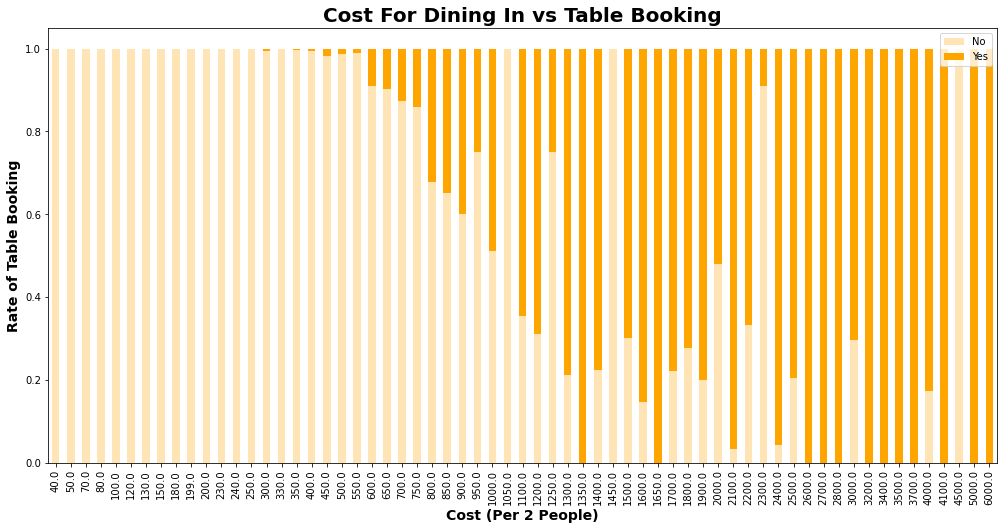

In [22]:
# Generate a Stacked Bar Chart
Percent_cost_booking.plot(kind='bar', stacked=True, color=['moccasin', 'orange'])
plt.title('Cost For Dining In vs Table Booking', fontsize=20, weight='bold')
plt.xlabel('Cost (Per 2 People)', fontsize=14, weight='bold')
plt.ylabel('Rate of Table Booking', fontsize=14, weight='bold')
plt.legend(loc='upper right')
plt.show()

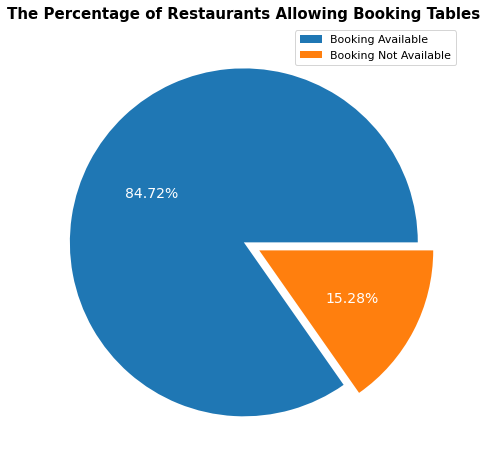

In [23]:
# Create a Pie chart for better visualization
percent_book_table = df['book_table'].value_counts(normalize=True)
label = ['Booking Available', 'Booking Not Available']

# Explode the 2nd slide (i.e. 'Booking Not Available')
explode = (0, 0.1)

plt.figure(figsize=(15,8))
plt.pie(percent_book_table, autopct='%.2f%%', textprops={'fontsize': 14, 'color':'w'}, explode = explode)
plt.title('The Percentage of Restaurants Allowing Booking Tables', fontsize=15, weight='bold')
plt.legend(label, fontsize=11)
plt.show()

## Insight:
- Based on the stacked bar chart, we are able to answer the question: "Why is there a negative relationship between Cost and Booking Table?". Previously, I thought it was because the more expensive a restaurant, the more popular it is and hence, means the place
is not open to customers booking in advance. It's fascinating to discover how wrong I was! It turned out to be the other way around: the more expensive 
a restaurant is (above 1300 for 2 people), the less likely that they don't provide booking options
- While the pie chart confirms that the majority of Bangalore restaurants offers booking options, our stacked bar graph shows a deeper story:
only the more expensive places have it! More affordable eating places probably are just for walk in only (makes sense since you don't see people booking tables for hawker centers right? :D)

# 4. Create a distribution graph for column 'rating' to closely examine the dataset

/Users/lephungdanthanh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


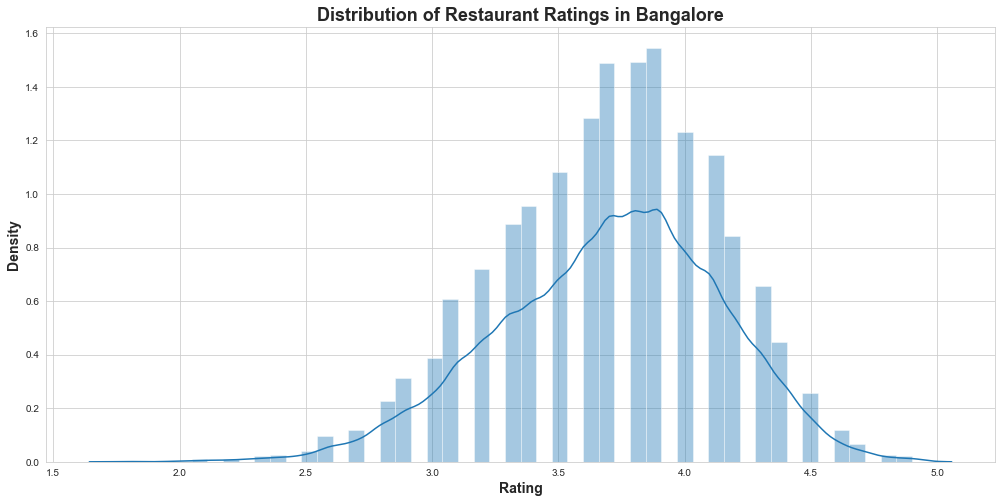

In [24]:
# Get a distribution chart 
sns.set_style(style='whitegrid')
sns.distplot(df['rate'])
plt.title('Distribution of Restaurant Ratings in Bangalore', fontsize=18, weight='bold')
plt.xlabel('Rating', fontsize=14, weight='bold')
plt.ylabel('Density', fontsize=14, weight='bold')
plt.show()

## Insight:
Though the dataset has some missing values for Ratings, more than 60% of Bangalore restaurants have rating below 4.0 out of 5. Restaurants with 4.5 and above are very rare.

# 5. Find the top 10 restaurants with the highest number of outlets around the city of Bangalore

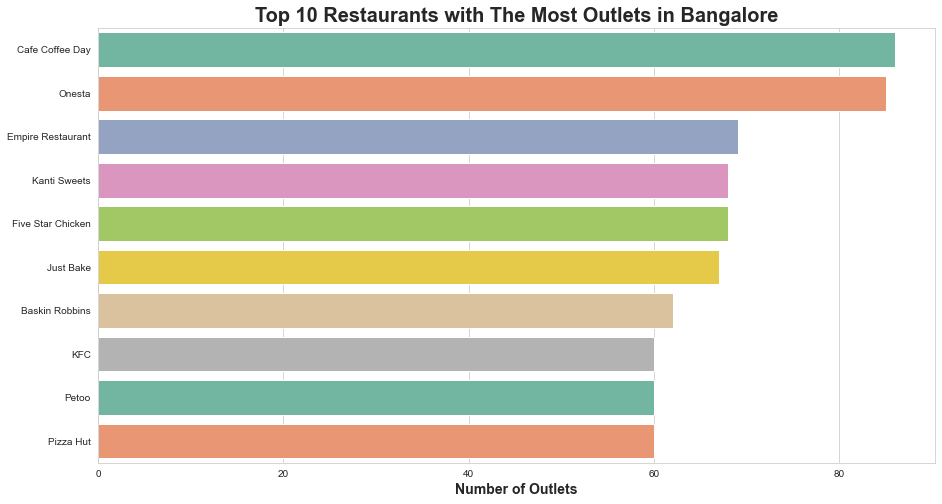

In [25]:
# Count the outlets of each restaurant 
restaurant_outlet = df['name'].value_counts()[0:10]

# Visualize the results
plt.figure(figsize=(15,8))
sns.barplot(x=restaurant_outlet, y=restaurant_outlet.index, palette='Set2')
plt.title("Top 10 Restaurants with The Most Outlets in Bangalore", fontsize=20, weight='bold')
plt.xlabel('Number of Outlets', fontsize=14, weight='bold')
plt.rcParams['ytick.labelsize']=14
plt.show()

## Insight:

Seems like Cafe Coffee Day is quite popular, with over 80 stores. Onesta comes second with just slightly fewer outlets (but still more than 80 restaurants).

## 6. What are top 10 most popular restaurant types in Bangalore?

In [27]:
# Count values of most popular restaurant types
df['rest_type'].value_counts().head(10)

Quick Bites           13871
Casual Dining          9608
Cafe                   3368
Dessert Parlor         1850
Delivery               1666
Takeaway, Delivery     1278
Casual Dining, Bar     1092
Bakery                  704
Bar                     640
Beverage Shop           639
Name: rest_type, dtype: int64

## Learning Note: 
After doing some Googling and reading on StackOverflow, I realize there are several different ways where I can count distinct values of restaurant type without having to write endless loops:
-  **collections.Counter** is built specifically for high performance tasks with a large dataset. Loops can work perfectly fine for a small dataset, but anything more you have to explore other efficient ways to write your codes. Enter collections!
- **get_dummies()** method can convert the rest_type column into dummy/indicator variables and I just have to stack the results and sum them up to get the frequency of the most 10 popular words.

In [28]:
# Import collections.Counter
import collections
import itertools

In [40]:
# Use collections.Counter to get the most 10 common type (Note that the result is in a list form)
collections.Counter(itertools.chain.from_iterable(v.split(',') for v in df['rest_type'])).most_common(10)

[('Quick Bites', 14193),
 ('Casual Dining', 11221),
 ('Cafe', 3960),
 ('Dessert Parlor', 2268),
 ('Delivery', 1666),
 ('Takeaway', 1357),
 (' Delivery', 1278),
 (' Bar', 1228),
 ('Bakery', 1131),
 ('Bar', 1045)]

In [35]:
# Use get_dummies and sum to achieve the same objective
df['rest_type'].str.get_dummies(',').replace(0,np.nan).stack().sum(level=1)

Casual Dining      11221.0
 Casual Dining       961.0
Cafe                3960.0
Quick Bites        14193.0
 Cafe                643.0
 Quick Bites         937.0
Delivery            1666.0
Mess                 180.0
Dessert Parlor      2268.0
 Dessert Parlor      427.0
Bakery              1131.0
Pub                  731.0
 Delivery           1278.0
Takeaway            1357.0
Fine Dining          401.0
Beverage Shop        981.0
Sweet Shop           517.0
Bar                 1045.0
 Sweet Shop           95.0
Kiosk                152.0
Food Truck            68.0
 Bar                1228.0
 Beverage Shop       148.0
 Bakery              256.0
Microbrewery         213.0
Lounge               486.0
Food Court           591.0
Dhaba                 17.0
 Pub                 174.0
 Microbrewery        144.0
 Food Court           23.0
Club                  41.0
 Irani Cafee          15.0
 Lounge               54.0
Confectionery         15.0
 Kiosk                 3.0
Bhojanalya             3.0
 

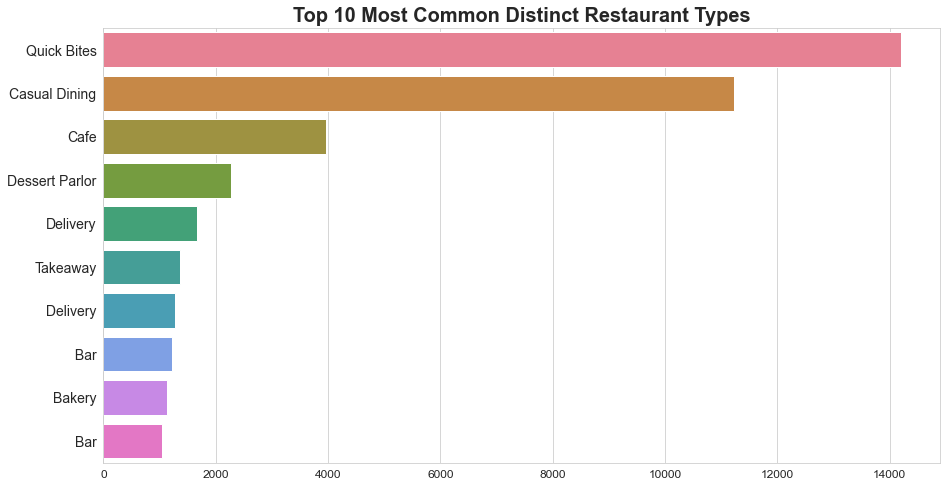

In [44]:
# Top 10 most popular restaurant type (distinct values)
d = df['rest_type'].str.get_dummies(',').replace(0,np.nan).stack().sum(level=1).nlargest(10)

# Visualize the result
plt.figure(figsize=(15,8))
sns.barplot(x=d, y=d.index, palette='husl')
plt.title('Top 10 Most Common Distinct Restaurant Types', fontsize=20, weight='bold')
plt.rcParams['xtick.labelsize']=20
plt.show()

## Insight:
It seems that Quick Bites, followed by Casaul Dining and Cafe are the most popular restaurant types in Bangalore. As the
city is considered Silicon Valley of India, it makes sense that busy young working adults here prefer having a quick and comfortable
eating experience.

## 7. What are the locations in Bangalore city that has the highest number of restaurants?

In [49]:
# Count restaurants in each area
df['location'].value_counts()

BTM                      3873
Koramangala 5th Block    2296
HSR                      1993
Indiranagar              1800
JP Nagar                 1710
                         ... 
Yelahanka                   4
West Bangalore              3
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: location, Length: 92, dtype: int64

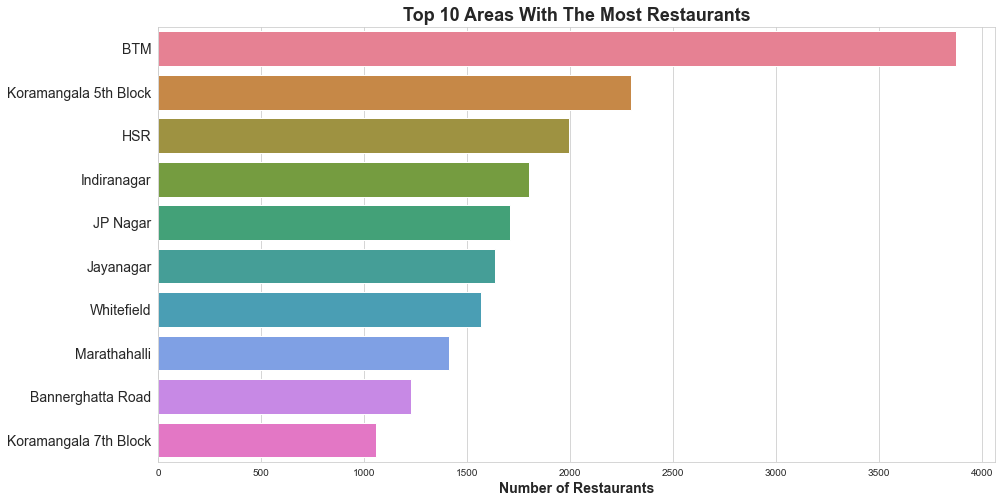

In [58]:
# Visualize results for top 10
plt.figure(figsize=(15,8))
restaurant_location = df['location'].value_counts().head(10)
sns.barplot(y=restaurant_location.index, x=restaurant_location, palette='husl')
plt.title('Top 10 Areas With The Most Restaurants', fontsize=18, weight='bold')
plt.xlabel('Number of Restaurants', fontsize=14, weight='bold')
plt.show()

## Insight:
BTM (Byrasandra, Tavarekere and Madivala Layout) in Bangalore has the outstandingly highest number of restaurant (4000 places)and almost
doubled the second place - Koramangala 5th Block with around 2300 restaurants. If I were a restaurant owner, I would not recommend
opening a restaurant here because of the extremely high competition.

## 8. Explore relationship between Cost and Rating, categorized by Options for Online Delivery

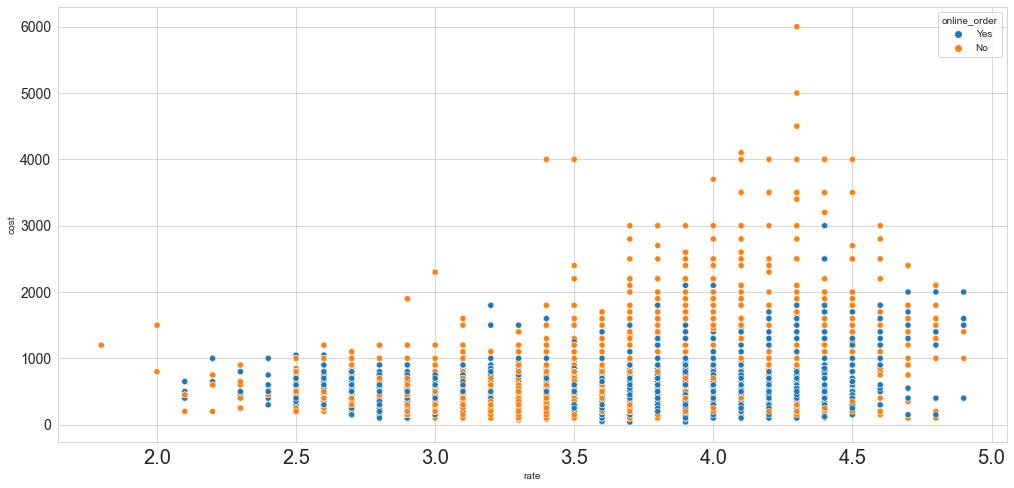

In [47]:
sns.scatterplot(data=df, x='rate', y='cost', hue='online_order')
plt.show()